In [1]:
import scipy
import scipy.cluster.hierarchy as sch
import pandas as pd
import scipy.cluster.hierarchy as spc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_corr(input_corr, size=10):
    # Compute the correlation matrix for the received dataframe
    corr = input_corr.corr()
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

    for (i, j), z in pd.np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

In [3]:
# %% load data
df = pd.read_excel('./inputs/Industrial Returns.xlsx', index_col=0)
# format field names so they're more compact
df.columns = df.columns.str.replace('QIS - ', '').str.replace(' \(all\)', '')
# %% params
#  IMPORTANT: CENTROID, MEDIAN AND WARD METHODS REQUIRE EUCLIDEAN DISTANCE TO WORK PROPERLY
method = 'ward'

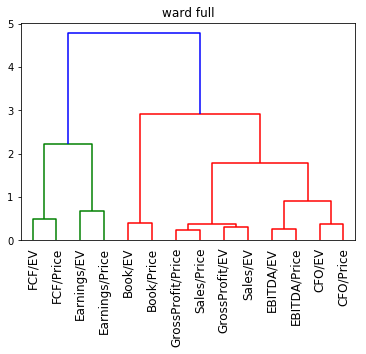

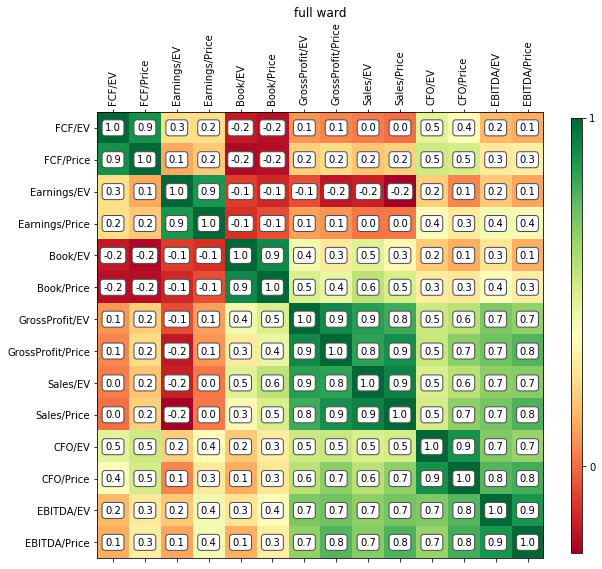

In [4]:
# %% full data

plt.figure()
X = df.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method=method)
dendro = sch.dendrogram(L, leaf_rotation=90, labels=df.columns)
plt.title('%s full' % method)
plt.show()
ind = sch.fcluster(L, 0.5 * d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((pd.np.argsort(ind)))]
df_aux = df.reindex(columns, axis=1)
plot_corr(df_aux)
plt.title('full %s' % method, y=1.2)
plt.show()



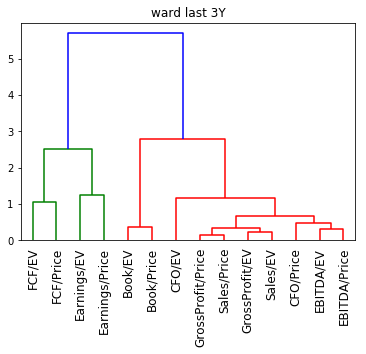

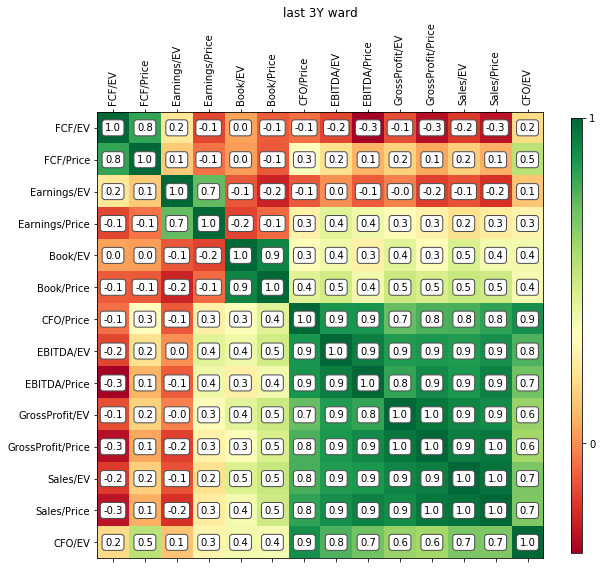

In [6]:
# %% last 3 years
plt.figure()
df2 = df['2016':][:]
X = df2.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method=method)
dendro = sch.dendrogram(L, leaf_rotation=90, labels=df2.columns)
plt.title('%s last 3Y' % method)
plt.show()
ind = sch.fcluster(L, 1, 'distance')
columns = [df2.columns.tolist()[i] for i in list((pd.np.argsort(ind)))]
df2_aux = df2.reindex(columns, axis=1)
plot_corr(df2_aux)
plt.title('last 3Y %s' % method, y=1.2)
plt.show()


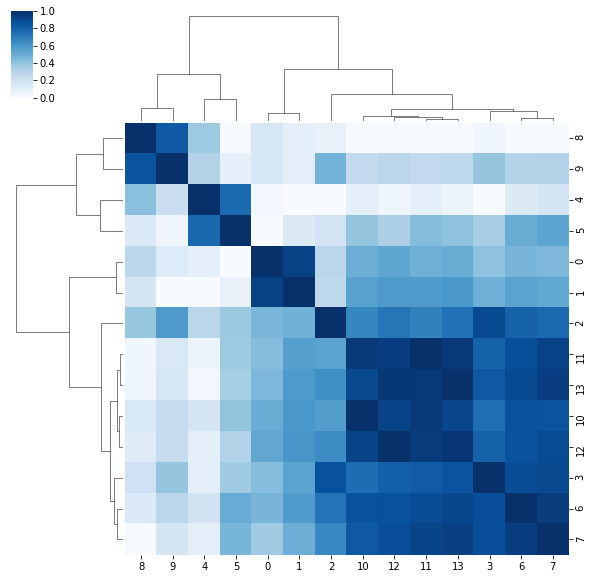

In [7]:

sns.clustermap(X, metric="euclidean", method="ward", cmap="Blues", standard_scale=1)
plt.show()

In [ ]:
# %% load data
df_csv = pd.read_csv('./inputs/indu_value_exposures.csv')
targets = ['FCF/EV', 'FCF/Price', 'Earnings/EV', 'Earnings/Price']
# format field names so they're more compact
df_csv.columns = df_csv.columns.str.replace('QIS - ', '').str.replace(' \(all\)', '')
df_csv = df_csv.drop(df_csv.columns[1], axis=1)
df_csv['Date'] = pd.to_datetime(df_csv['Date']).dt.date
grouper = df_csv.groupby('Date')
corr_dict = {}
eric_rules = pd.DataFrame(columns=df_csv.drop('Date', axis=1).columns)
for g in grouper:
    corr_dict[g[0]] = g[1].corr('spearman')['CFO/EV']
    eric_rules.loc[pd.to_datetime(g[0])] = corr_dict[g[0]]
# plot the results
plt.figure()
eric_rules['2016':][targets].plot()
plt.show()
